# Ejercicio de Regresión Logistica en Python

Para comenzar se realizan los import necesarios de los paquetes que se utilizan durante el ejercicio

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Carga del archivo scv (datos de entrada)

El archivo csv(por simplidad, se considera que estrá en el mismo directorio que el archivo de notebook.ipynb) y se asigna mediante Pandas a la variable dataframe. Al utilizar el método dataframe.head() se utiliza en pantalla los 5 primeros regístros

In [5]:
dataframe = pd.read_csv(r"usuarios win-mac-lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


A continuación se utiliza el método dataframe.describe() que proporciona estadística descriptiva del conjutno de datos: media, desviación estándar, valores mínimo y máximo de cada atributo.

In [6]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


Se cuantifican resultados de cada tipo usando la función groupby y se visualizan 86 usuarios "Clase 0", es decir Windows, 40 usuarios Mac y 44 de Linux

In [7]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

Se realiza una visualización para conocer a los atributos característicos de la información que se trabaja y su corrección.

En formato de histograma aparecen los cuatro atributos de entrada etiquetados como: "duración", "páginas", "acciónes". Se puede apreciar gráficamente entre qué valores se comprenden sus mínimos y máximos y en qué itervalos se concentra la mayor densidad de registros.

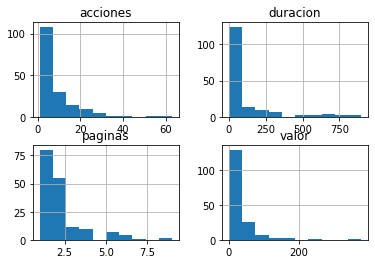

In [9]:
dataframe.drop(['clase'],1).hist()
plt.show()

Además s epueden interrelacionar las entradas de a pares, para ver como se concentran línealmente las salidas de usuarios por colores: sistema operativo windows en azul, Macintosh en verde y Linux en rojo.

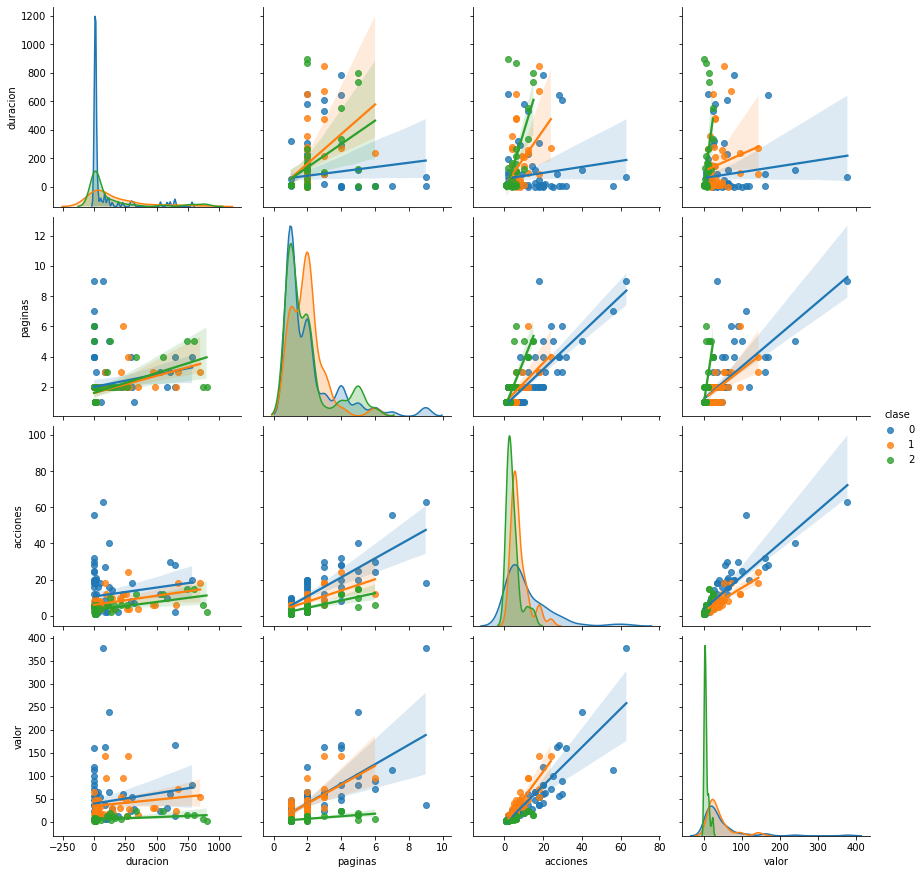

In [12]:
sb.pairplot(dataframe.dropna(), hue='clase', height=3,vars=["duracion","paginas","acciones","valor"],kind='reg')

## Se establece el modelo de R Log

Se cargan los atributos de las 4 columnas de entrada en X exluyendo la columna "clase" con el método drop(). La columna "clase" se agrega al atributo y se ejecuta X.shape para comprobar la dimensión de la matriz con datos de entrada